In [1]:
import os

In [4]:
data_dir = 'C:\\Users\\markp\\Downloads\\cell_images\\cell_images'

In [5]:
os.listdir(data_dir)

['test', 'train']

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from matplotlib.image import imread

In [8]:
test_path = data_dir+'\\test\\'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
train_path = data_dir + '\\train\\'

In [12]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path+'parasitized\\')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [30]:
parasitized_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'


In [38]:
parasitized_cell = imread(parasitized_cell)

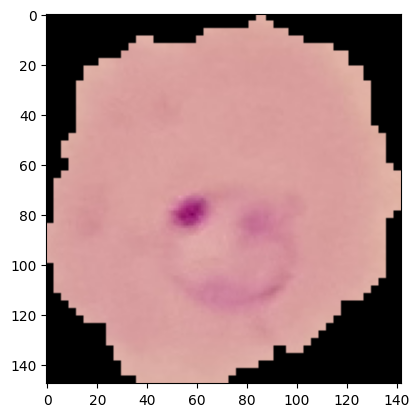

In [39]:
plt.imshow((parasitized_cell))

In [33]:
uninfected_cell = train_path +'uninfected\\'+ os.listdir(train_path+'uninfected\\')[0]

In [36]:
uninfected_cell = imread(uninfected_cell)

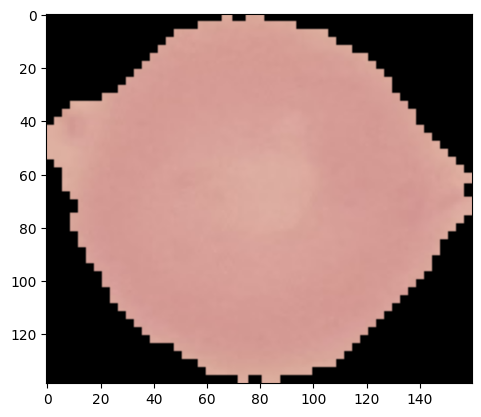

In [37]:
plt.imshow(uninfected_cell)

In [41]:
len(os.listdir(train_path+'parasitized\\'))

1300

In [42]:
len(os.listdir(train_path+'uninfected\\'))

12480

In [43]:
len(os.listdir(test_path+'parasitized\\'))

1300

In [56]:
(os.listdir(test_path+'uninfected\\'))

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [55]:
imread(train_path+'parasitized\\'+(os.listdir(train_path + 'parasitized\\')[21])).shape

(115, 121, 3)

# Making all the images of same shape

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected\\'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [63]:
#dim1

In [64]:
#dim2

In [65]:
np.mean(dim1)

130.92538461538462

In [66]:
np.mean(dim2)

130.75

In [67]:
image_shape = (130,130,3)

# Image Augmentation 
## Generate more images from a single image 

In [68]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [90]:
img_gen = ImageDataGenerator(rotation_range=200,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range= 0.1,
                             zoom_range= 0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

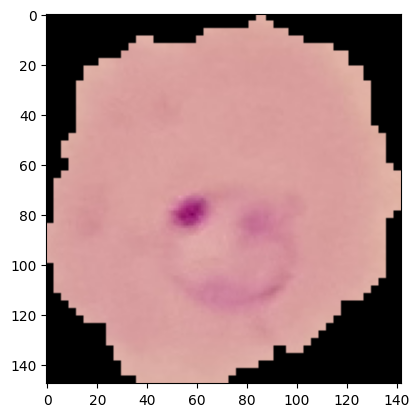

In [91]:
parasite_image = plt.imshow(parasitized_cell)

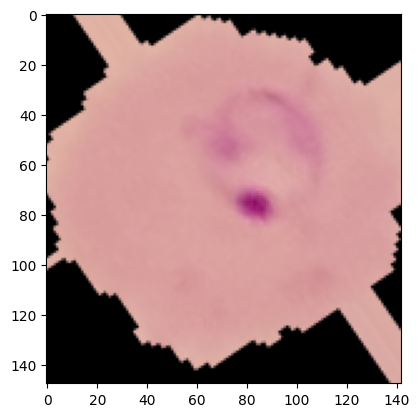

In [93]:
plt.imshow(img_gen.random_transform(parasitized_cell))

## Augmenting all the images 
### Before doing that make sure that the images of each class i.e., "parasitized" & "uninfected" classes are separately saved and are in order in each "TEST" & "TRAIN" folder

In [95]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [96]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [97]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Building Model

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [108]:
model = Sequential()

model.add(Conv2D(filters=32 , kernel_size=(4,4) , input_shape = image_shape , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32 , kernel_size=(4,4) , input_shape = image_shape , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32 , kernel_size=(4,4) , input_shape = image_shape , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128 , activation='relu'))
Dropout(rate = 0.5)

model.add(Dense(1 , activation='sigmoid'))

model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])


In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 127, 127, 32)      1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)      

In [110]:
train_img_gen = img_gen.flow_from_directory(train_path,target_size=image_shape[:2] ,
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True)

Found 24958 images belonging to 2 classes.


## We should always make "shuffle = False" in case of test set

In [111]:
test_img_gen = img_gen.flow_from_directory(test_path,target_size=image_shape[:2] ,
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [112]:
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
early_stop = EarlyStopping(monitor='val_loss' , patience = 2)

In [114]:
model.fit_generator(train_img_gen , epochs = 20 , validation_data= test_img_gen , callbacks=[early_stop])

C:\Users\markp\AppData\Local\Temp\ipykernel_8472\561880267.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_img_gen , epochs = 20 , validation_data= test_img_gen , callbacks=[early_stop])


Epoch 1/20
780/780 [==============================] - 524s 668ms/step - loss: 1.1214 - accuracy: 0.5442 - val_loss: 0.6894 - val_accuracy: 0.5485
Epoch 2/20
780/780 [==============================] - 465s 596ms/step - loss: 0.6859 - accuracy: 0.5533 - val_loss: 0.6874 - val_accuracy: 0.5612
Epoch 3/20
780/780 [==============================] - 412s 526ms/step - loss: 0.6830 - accuracy: 0.5655 - val_loss: 0.6865 - val_accuracy: 0.5627
Epoch 4/20
780/780 [==============================] - 408s 521ms/step - loss: 0.6789 - accuracy: 0.5711 - val_loss: 0.6760 - val_accuracy: 0.5904
Epoch 5/20
780/780 [==============================] - 475s 606ms/step - loss: 0.6876 - accuracy: 0.5626 - val_loss: 0.6848 - val_accuracy: 0.5508
Epoch 6/20
780/780 [==============================] - 431s 549ms/step - loss: 0.6792 - accuracy: 0.5756 - val_loss: 0.6524 - val_accuracy: 0.6208
Epoch 7/20
780/780 [==============================] - 410s 522ms/step - loss: 0.5588 - accuracy: 0.6868 - val_loss: 0.2806 -

In [115]:
model.evaluate_generator(test_img_gen)

C:\Users\markp\AppData\Local\Temp\ipykernel_8472\2315898446.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_img_gen)


[0.1799767017364502, 0.9469230771064758]

In [116]:
pred = model.predict_generator(test_img_gen)

C:\Users\markp\AppData\Local\Temp\ipykernel_8472\2006573136.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_img_gen)


In [118]:
predictions = pred > 0.5

In [119]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [124]:
print(classification_report(predictions , test_img_gen.classes))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95      1265
        True       0.96      0.94      0.95      1335

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [125]:
confusion_matrix(predictions,test_img_gen.classes)

array([[1216,   49],
       [  84, 1251]], dtype=int64)

# checking the model to classify a new image from test set

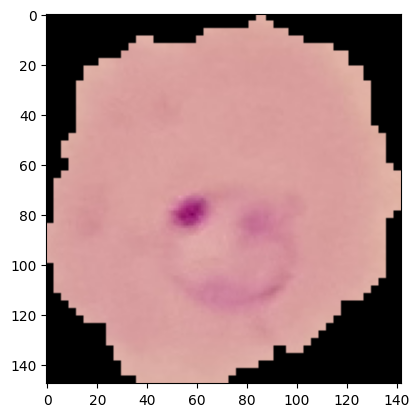

In [126]:
plt.imshow(parasitized_cell)

In [127]:
from tensorflow.keras.preprocessing import image

In [140]:
new_image_path = test_path+'parasitized\\'+os.listdir(test_path+'parasitized\\')[2]

In [141]:
new_image = image.load_img(new_image_path , target_size=image_shape)

In [142]:
new_image_arr = image.img_to_array(new_image)

In [144]:
new_image_arr.shape

(130, 130, 3)

### If we directly put this aaray without reshaping it then it will show Error:
### (InvalidArgumentError: Graph execution error:)
### So , We will change the shape of the array from (130,130,3) to (1,130,130,3) where 1 shows batch size




In [156]:
new_image_arr = new_image_arr.reshape(1,130,130,3)

In [157]:
model.predict_generator((new_image_arr))

C:\Users\markp\AppData\Local\Temp\ipykernel_8472\808565623.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model.predict_generator((new_image_arr))


array([[0.0008415]], dtype=float32)

In [153]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [158]:
from tensorflow.keras.models import save_model

In [161]:
save_model(model , 'malaria_detetction_model')

INFO:tensorflow:Assets written to: malaria_detetction_model\assets


INFO:tensorflow:Assets written to: malaria_detetction_model\assets
